In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
pip install mtcnn

In [103]:
from mtcnn import MTCNN
import numpy as np
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt


In [24]:
# Load Model used for detecting Face Mask
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Face_mask_detection/model_1')

In [139]:

def get_faces_in_image(image):
  face_images = []
  faces = detector.detect_faces(image)
  # cv2_imshow(image)
  for face in faces:
    x,y,width,height = face['box']
    cv2.rectangle(image, (x,y),(x + width, y + height), (0,255,0),2)
    cropped_image = image[y:y + height, x:x + width]
    cropped_image = cv.resize(cropped_image, (128,128), cv.INTER_AREA)
    face_images.append(cropped_image)
  face_images = np.array(face_images)
  predictions = model.predict(face_images)
  return face_images

def make_prediction_on_single_image(img_file_path, model):
  img = cv.imread(img_file_path)
  face_images = get_faces_in_image(img)
  predictions = model.predict(face_images)
  predictions = np.where(predictions <0.5, 0,1)
  texts = []
  for prediction in predictions:
    if prediction == 0:
      text = 'No_masked'
    else:
      text = 'masked'
    texts.append(text)
  return texts


In [140]:
print(detection)


[{'box': [515, 219, 331, 445], 'confidence': 0.999944806098938, 'keypoints': {'left_eye': (619, 382), 'right_eye': (771, 378), 'nose': (704, 496), 'mouth_left': (635, 561), 'mouth_right': (762, 556)}}]


In [152]:
img_file_path = '/content/gdrive/MyDrive/Face_mask_detection/face_mask_data/data/images/1888.jpg'
predictions = make_prediction_on_single_image(img_file_path, model)

['No_masked']


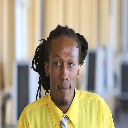

In [153]:
print(predictions)
img = cv.imread(img_file_path)
img = cv.resize(img, (128,128), cv.INTER_AREA)
cv2_imshow(img)
